In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

Dataset 1

In [4]:
data = pd.read_csv("data_data_preprocessing/data-preprocessed.csv")

In [5]:
data.head()

,x,y,z,t,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4


In [6]:
x= data[['x','y','z','t']]
y = data[['class']]

In [9]:
y["class"].unique()

array([1, 5, 2, 4, 6, 3], dtype=int64)

In [12]:
# 
km = KMeans(n_clusters=6)
%time {km.fit(x)}
labels = km.predict(x)
plt.figure(figsize=(6,6))
plt.scatter(x[:, 2], x[:, 1], c=labels, s=100)
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,1], c='r');

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: total: 234 ms
Wall time: 529 ms


InvalidIndexError: (slice(None, None, None), 2)

<Figure size 600x600 with 0 Axes>

In [ ]:
# Amdi goes from 0 to 1, one means there good clusters 0 means is not good
print(adjusted_mutual_info_score(iris['target'], labels))

In [17]:
def optimise_kmeans(data,k_max):

    means = []
    inertias = []
    for k in range(1,k_max):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # elbow plot generation
    fig = plt.subplots(figsize=[10,5])
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

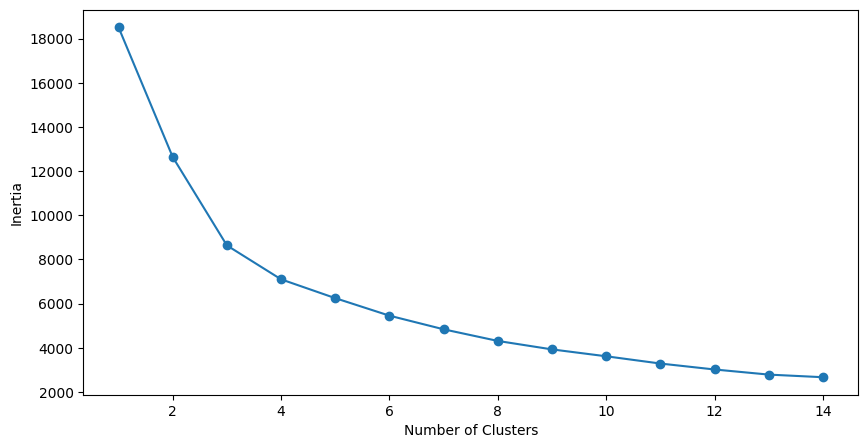

In [21]:
optimise_kmeans(data=x, k_max=15)
